In [1]:
# Felipe Carvalho Pereira
# E-mail: felipe.cpereira92@gmail.com

In [2]:
# Importando os módulos nescessários
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [3]:
# Lendo a base de dados
cidades = pd.read_csv('cidades_br.csv', encoding = 'UTF-8', sep = ',', header = 0)

In [4]:
# Visualizando a base
cidades.head()

,Código IBGE,Nome do Município,Código UF,UF,Estado,Latitude,Longitude
0,5200050,Abadia de Goiás,52,GO,Goiás,-16.75730,-49.4412
1,3100104,Abadia dos Dourados,31,MG,Minas Gerais,-18.48310,-47.3916
2,5200100,Abadiânia,52,GO,Goiás,-16.19700,-48.7057
3,3100203,Abaeté,31,MG,Minas Gerais,-19.15510,-45.4444
4,1500107,Abaetetuba,15,PA,Pará,-1.72183,-48.8788


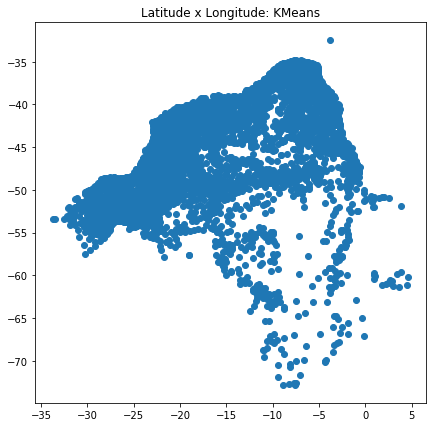

In [5]:
# Visualizando as coordenadas no gráfico tipo Scatter
x = cidades.Latitude.values # Definindo eixo X do gráfico
y = cidades.Longitude.values # Definindo eixo Y do gráfico
plt.figure(figsize=(7,7)) # Definindo as dimenções do gráfico
plt.title("Latitude x Longitude: KMeans") # Definição do título
plt.scatter(x, y);

Text(0.5, 1.0, 'Latitude x Longitude: DBSCAN')

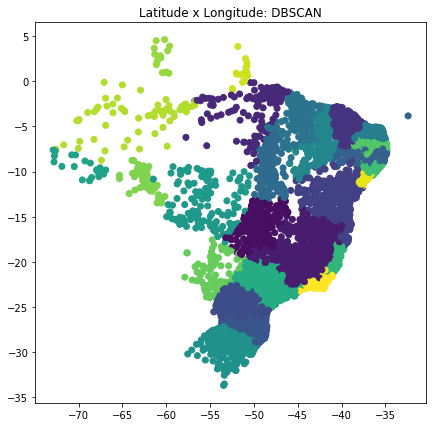

In [6]:
# Visualizando no DBSCAN e agrupando pelo código UF
x = cidades.Longitude.values
y = cidades.Latitude.values
grafico5 = DBSCAN(eps=.6, min_samples=4)
grupos = grafico5.fit_predict(cidades[['Código UF']].values)
plt.figure(figsize=(7,7))
plt.scatter(x,y,c=grupos);
plt.title("Latitude x Longitude: DBSCAN")

Text(0.5, 1.0, 'Região sudeste: KMEANS')

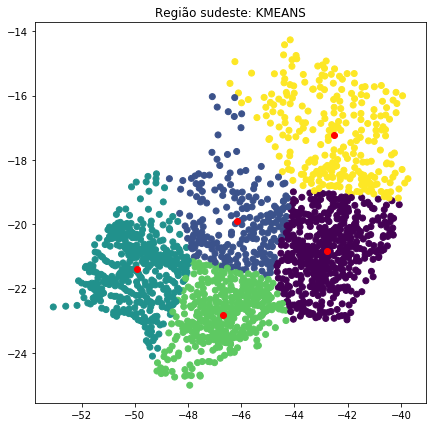

In [7]:
# KMEANS para visualizar a regição sudeste com 5 clusters
pd.options.display.max_columns = None
cidades.query('UF == "ES" or UF == "MG" or UF == "RJ" or UF == "SP" ', inplace = True)
grafico6 = KMeans(n_clusters=5)
grupo = grafico6.fit_predict(cidades[['Longitude','Latitude']].values)
x = cidades.Longitude.values
y = cidades.Latitude.values
plt.figure(figsize=(7,7))
plt.scatter(x, y, c=grupo);
plt.scatter(grafico6.cluster_centers_[:,0],grafico6.cluster_centers_[:,1], c='red');
plt.title("Região sudeste: KMEANS")